In [98]:
import psycopg2 as ps
import configparser
import pandas as pd
import matplotlib

In [4]:
config = configparser.ConfigParser()
config.read('dwh.cfg')
con = ps.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))

In [6]:
cur = con.cursor()

### Snapshot of the Fact and Dimension Tables

In [15]:
songplays = "select * from songplays limit 5"
user = "select * from users limit 5"
songs = "select * from songs limit 5"
time = "select * from time limit 5"
artists = "select * from artists limit 5"

In [16]:
songplays_df = pd.read_sql_query(songplays, con)
user_df = pd.read_sql_query(user, con)
songs_df = pd.read_sql_query(songs, con)
time_df = pd.read_sql_query(time, con)
artists_df = pd.read_sql_query(artists, con)

#### Songplays Table

In [17]:
songplays_df

,songplay_id,start_time,user_id,level,song_id,artist_id,session_id,location,user_agent
0,57,2018-11-28 17:39:27,49,paid,SODKJWI12A8151BD74,ARM0P6Z1187FB4D466,1023,"San Francisco-Oakland-Hayward, CA",Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...
1,121,2018-11-13 08:30:01,25,paid,SODWLOQ12AB017EC73,AR4SRB61187FB5538F,442,"Marinette, WI-MI","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK..."
2,185,2018-11-05 17:31:40,35,free,SONTFNG12A8C13FF69,AR52EZT1187B9900BF,171,"St. Louis, MO-IL","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5..."
3,249,2018-11-05 10:18:12,42,paid,SOBONKR12A58A7A7E0,AR5E44Z1187B9A1D74,129,"New York-Newark-Jersey City, NY-NJ-PA","""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK..."
4,313,2018-11-15 14:42:58,97,paid,SOYTFSY12A6D4FD84E,ARRFSMX1187FB39B03,605,"Lansing-East Lansing, MI","""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5..."


#### Users Table

In [19]:
user_df

,user_id,first_name,last_name,gender,level
0,52,Theodore,Smith,M,free
1,99,Ann,Banks,F,free
2,43,Jahiem,Miles,M,free
3,6,Cecilia,Owens,F,free
4,25,Jayden,Graves,M,paid


#### Songs Table

In [20]:
songs_df

,song_id,title,artist_id,year,duration
0,SOUOLYL12A6D4FBD4B,A Favor,ARAZP5N1187B9B4D5D,2004,359.33994
1,SOAMCTE12AC3DF6134,Go64,AR2AHH11187B99D6D0,2006,279.30077
2,SOXGBUO12AC468B9AF,Joyful Sound,ARWTFGY1187B992CBA,2001,388.59710
3,SOWYXJC12A8C13B81E,Verde Bosque,ARU3YYC1187FB43FEE,1994,355.29097
4,SOPHMCZ12A81C21C54,Selling Jolson A Baseball Team,AR7QAHN1187FB35F8B,0,586.70974


#### Time Table

In [21]:
time_df

,start_time,hour,day,week,month,year,weekday
0,2018-11-04 00:15:55,0,4,44,11,2018,SUN
1,2018-11-04 00:50:03,0,4,44,11,2018,SUN
2,2018-11-04 02:37:13,2,4,44,11,2018,SUN
3,2018-11-04 02:54:52,2,4,44,11,2018,SUN
4,2018-11-04 02:58:57,2,4,44,11,2018,SUN


#### Artists Table

In [23]:
artists_df

,artist_id,name,location,latitude,longitude
0,ARQZCW31187B9AC64C,Supervielle,,NaN,NaN
1,ARBF7KQ1187FB455DE,Jesse Winchester,"Shreveport, LA",32.51460,-93.74727
2,ARCPKCY1242078311A,Bostich_ Fussible,,NaN,NaN
3,ARPBMSQ1187B98AE69,Sounds From The Ground / Tanya Tagaq Gillis,UK - England - South East,52.88356,-1.97405
4,ARY65231187FB46283,Starting Rock Feat. Diva Avari,,NaN,NaN


## Analytic Queries
##### *Run set of analytic queries on the tables to find useful information about users, artists, songs etc.*

#### Top 5 Users

In [61]:
top_users = """
                SELECT a1.user_id,a2.first_name||' '||a2.last_name Name, count(distinct start_time) No_of_Sessions
                FROM songplays a1
                JOIN users a2 ON a1.user_id = a2.user_id
                GROUP BY a1.user_id,Name
                ORDER BY No_of_Sessions DESC
                LIMIT 5
"""

In [62]:
top_users_df = pd.read_sql_query(top_users, con)

In [63]:
top_users_df

,user_id,name,no_of_sessions
0,49,Chloe Cuevas,42
1,97,Kate Harrell,32
2,80,Tegan Levine,31
3,44,Aleena Kirby,21
4,73,Jacob Klein,18


#### Top 5 Songs

In [67]:
top_songs = """
                SELECT 
                a1.song_id,
                a2.title,
                COUNT(distinct a1.user_id) No_of_User
                FROM songplays a1
                JOIN songs a2 ON a1.song_id = a2.song_id
                GROUP BY a1.song_id,a2.title
                ORDER BY No_of_User DESC
                LIMIT 5
"""

In [68]:
top_songs_df = pd.read_sql_query(top_songs, con)

In [69]:
top_songs_df

,song_id,title,no_of_user
0,SOBONKR12A58A7A7E0,You're The One,22
1,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,9
2,SOULTKQ12AB018A183,Nothin' On You [feat. Bruno Mars] (Album Version),7
3,SOUNZHU12A8AE47481,I CAN'T GET STARTED,6
4,SOTNHIP12AB0183131,Make Her Say,5


In [73]:
cur.execute("select distinct to_char(a1.start_time,'HH24') from songplays a1")

#### Activity Trend by Hour of the Day

In [87]:
activity = """
                SELECT
                TO_CHAR(a1.start_time,'HH24') Hr,
                Count(1) Session_Count
                FROM songplays a1
                GROUP BY Hr
                ORDER BY Hr
"""

In [88]:
activity_df = pd.read_sql_query(activity, con)

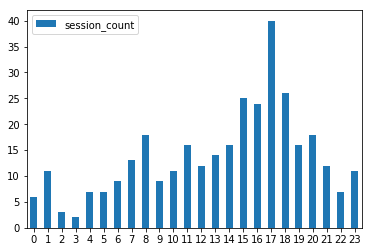

In [101]:
graph = activity_df.plot.bar(rot=0)

From the above chart, its visible that evening time is the most active time when users are listening to the songs. 5PM is the most active time. 